### 2D Deconvolution

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from waveletsyn import ricker

In [11]:
traces = np.loadtxt('traces2ms.txt')
fdom = 20
tn = 201
dt = 1
t, w = ricker(fdom, tn, dt)

In [14]:
W = np.eye(traces.shape[0], traces.shape[0])
for i in np.arange(0, W.shape[0], 1):
    W[:, i] = np.convolve(W[:, i], w, 'same')

prew = 1
W = W + np.eye(W.shape[0], W.shape[1])*prew
Sdecon = np.linalg.inv(W)@traces

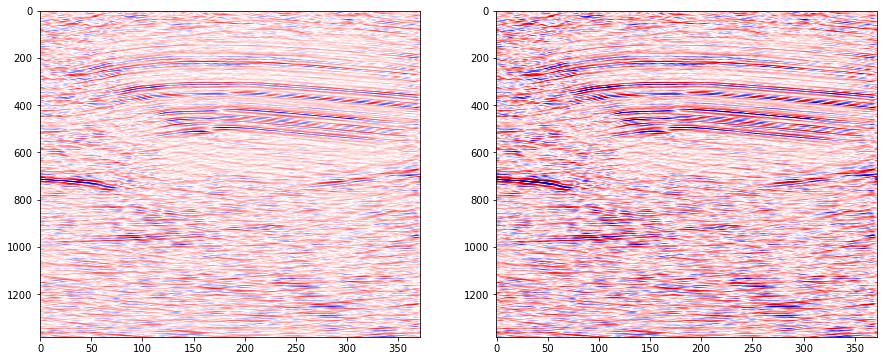

In [15]:
plt.figure(num=None, figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(traces, aspect='auto', cmap='seismic', vmin=np.min(traces), vmax= np.max(traces))
plt.subplot(1,2,2)
plt.imshow(traces, aspect='auto', cmap='seismic', vmin=np.min(Sdecon), vmax= np.max(Sdecon))
plt.show()